# Importing Required Libraries

In [125]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading and Viewing our Data Set

In [126]:
Train = pd.read_csv('training_dataset.csv')


In [127]:
Train.head()

,Unnamed: 0,observation_id,observation_timestamp,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,0,704d2a80-d52e-11ec-90ff-c7e6292284b3,2022-05-16 15:39:57,15,347.29,Cash+Credit,-0.7383,-0.1270,-0.1993,-0.8299,...,-0.6920,-0.4605,-0.5180,-1.0062,-0.6462,-0.6030,-0.4773,0.1748,-1.7951,-0.8284
1,1,1cacc1d0-e6ac-11ec-b65d-156af70ce36b,2022-06-07 21:52:23,21,361.59,Cash+Credit,0.6483,-0.0362,-0.0777,-0.7395,...,-0.6531,-0.4434,-0.6498,0.9031,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
2,2,6dc2b330-d37a-11ec-884e-dfe9ea4a7bd5,2022-05-14 11:38:52,11,850.73,Cash+Credit,-0.4950,-0.1268,-0.1974,1.3139,...,-0.6120,-0.1786,-0.6040,-1.4229,-0.6456,-0.6037,1.9337,-0.9093,2.4046,-0.7567
3,3,163ee0a0-0cca-11ed-a73c-8904b24187cc,2022-07-26 10:02:41,10,1175.69,Cash+Credit,-0.5594,-0.1270,-0.1991,-0.8299,...,-0.5472,0.1246,-0.5925,-1.4097,-0.6478,-0.6079,0.1288,-0.9093,-0.4983,-0.7567
4,4,5e3c5df0-d5ee-11ec-a5f2-3b6f99e95850,2022-05-17 14:33:50,14,3204.53,Cash+Credit,0.5693,-0.1221,-0.1632,-0.7071,...,-0.3838,0.1996,-0.5696,1.1231,-0.6475,-0.6032,1.0050,0.1748,1.5660,0.2356


# Getting Info on our Data

In [128]:
Train.describe(include="all")

,Unnamed: 0,observation_id,observation_timestamp,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
count,18512.000000,18512,18512,18512.000000,18512.000000,18512,18512.000000,18512.000000,18512.000000,18512.000000,...,18512.000000,18512.000000,18512.00000,18512.000000,18512.000000,18512.000000,18512.000000,18314.000000,18512.000000,16612.000000
unique,NaN,18512,18460,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,704d2a80-d52e-11ec-90ff-c7e6292284b3,2022-05-19 20:42:58,NaN,NaN,Cash+Credit,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,2,NaN,NaN,16310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9255.500000,NaN,NaN,12.316659,1169.814248,NaN,0.002944,0.000513,0.001174,-0.014366,...,0.017787,0.006959,0.01484,0.021682,0.018446,0.015523,-0.019027,0.022354,0.008615,0.019324
std,5344.098427,NaN,NaN,7.690665,818.455239,NaN,1.007499,1.119465,1.113356,0.988478,...,1.015479,1.039629,1.00561,0.978837,1.007041,1.005561,0.996364,1.003627,1.008285,1.006263
min,0.000000,NaN,NaN,0.000000,15.710000,NaN,-0.985800,-0.127000,-0.199400,-0.829900,...,-0.693400,-0.461800,-0.64980,-1.422900,-0.649300,-0.610600,-2.259200,-0.981600,-2.337000,-0.861400
25%,4627.750000,NaN,NaN,5.000000,369.160000,NaN,-0.624100,-0.126700,-0.197600,-0.767800,...,-0.649300,-0.441800,-0.64410,-0.737200,-0.649300,-0.610500,-0.420900,-0.981600,-0.348900,-0.861400
50%,9255.500000,NaN,NaN,14.000000,1165.795000,NaN,-0.335700,-0.125000,-0.168600,-0.368350,...,-0.458600,-0.229500,-0.55810,0.047700,-0.647100,-0.603700,0.033200,-0.547900,-0.308000,-0.756700
75%,13883.250000,NaN,NaN,19.000000,1457.487500,NaN,0.469400,-0.088450,-0.020600,0.361300,...,0.449700,0.295900,0.34740,0.886900,0.924200,0.328000,0.499800,1.379500,0.893900,1.338200


In [129]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   18512 non-null  int64  
 1   observation_id                               18512 non-null  object 
 2   observation_timestamp                        18512 non-null  object 
 3   hour_of_day                                  18512 non-null  int64  
 4   register__sales_dollar_amt_this_hour         18512 non-null  float64
 5   register__payment_types_accepted             18512 non-null  object 
 6   register__peak_sales_dollar_amt_per_hour     18512 non-null  float64
 7   register__sales_dollar_amt_last_hour         18512 non-null  float64
 8   register__sales_quantity_last_hour           18512 non-null  float64
 9   register__sales_quantity_rescanned_frac      18512 non-null  float64
 10

In [130]:
Train.shape

(18512, 63)

In [131]:
Train.isnull().sum()

Unnamed: 0                                        0
observation_id                                    0
observation_timestamp                             0
hour_of_day                                       0
register__sales_dollar_amt_this_hour              0
                                               ... 
region__nighttime_returns_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour_v2       198
region__peak_returns_dollar_amt_per_hour          0
region__peak_returns_dollar_amt_per_hour_v2    1900
Length: 63, dtype: int64

In [132]:
DropColumns = ['Unnamed: 0', 'observation_id']
Train.drop(DropColumns, axis = 1, inplace = True)

In [133]:
Train.head()

,observation_timestamp,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,2022-05-16 15:39:57,15,347.29,Cash+Credit,-0.7383,-0.1270,-0.1993,-0.8299,-0.1247,-0.5721,...,-0.6920,-0.4605,-0.5180,-1.0062,-0.6462,-0.6030,-0.4773,0.1748,-1.7951,-0.8284
1,2022-06-07 21:52:23,21,361.59,Cash+Credit,0.6483,-0.0362,-0.0777,-0.7395,-0.1135,-0.5251,...,-0.6531,-0.4434,-0.6498,0.9031,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
2,2022-05-14 11:38:52,11,850.73,Cash+Credit,-0.4950,-0.1268,-0.1974,1.3139,0.1075,-0.5251,...,-0.6120,-0.1786,-0.6040,-1.4229,-0.6456,-0.6037,1.9337,-0.9093,2.4046,-0.7567
3,2022-07-26 10:02:41,10,1175.69,Cash+Credit,-0.5594,-0.1270,-0.1991,-0.8299,-0.1247,-0.5251,...,-0.5472,0.1246,-0.5925,-1.4097,-0.6478,-0.6079,0.1288,-0.9093,-0.4983,-0.7567
4,2022-05-17 14:33:50,14,3204.53,Cash+Credit,0.5693,-0.1221,-0.1632,-0.7071,-0.1247,0.7604,...,-0.3838,0.1996,-0.5696,1.1231,-0.6475,-0.6032,1.0050,0.1748,1.5660,0.2356


# Prioritizing The Individual Attributes That Affect The Sales.

In [134]:
Train.columns

Index(['observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac',
       'register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level',
       'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 'store__n_employees_total',
    

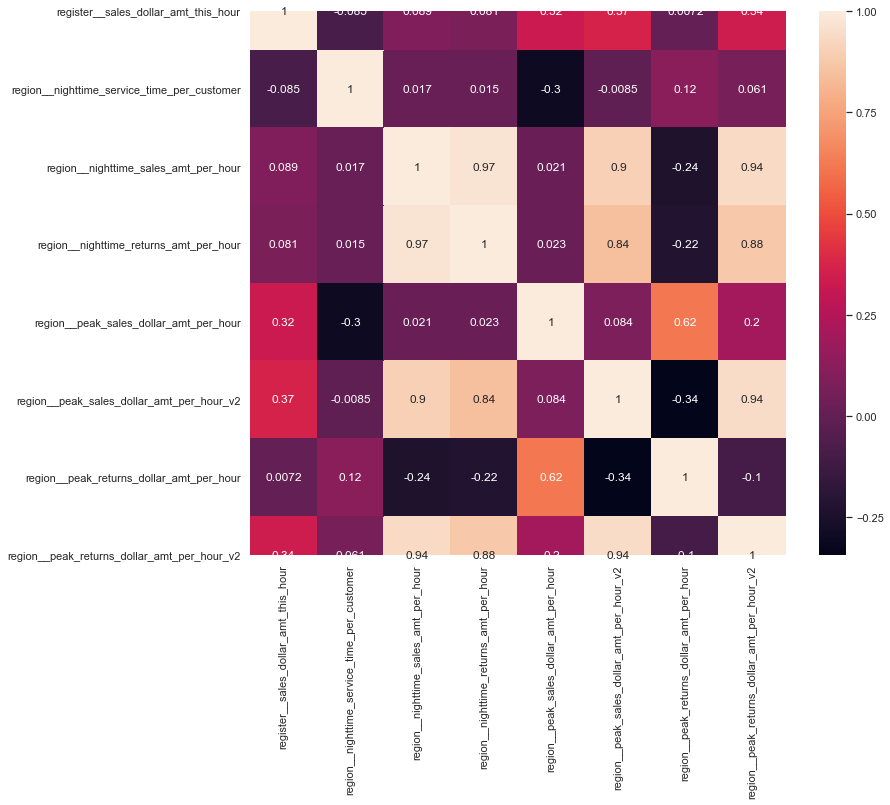

In [135]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','region__nighttime_service_time_per_customer',
       'region__nighttime_sales_amt_per_hour',
       'region__nighttime_returns_amt_per_hour',
       'region__peak_sales_dollar_amt_per_hour',
       'region__peak_sales_dollar_amt_per_hour_v2',
       'region__peak_returns_dollar_amt_per_hour',
       'region__peak_returns_dollar_amt_per_hour_v2' ]].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

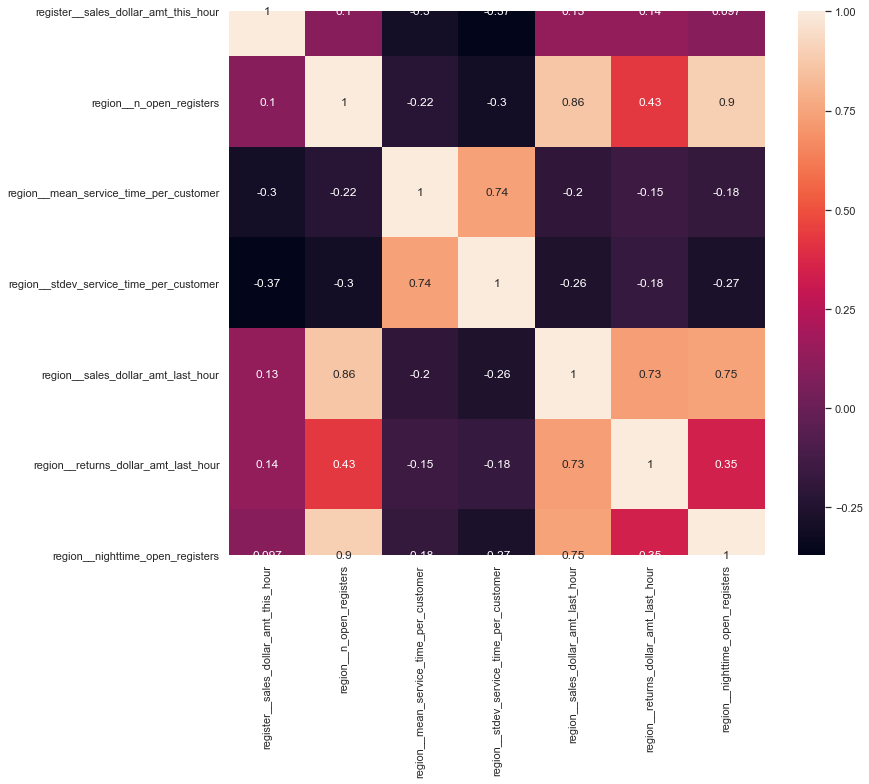

In [136]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','region__n_open_registers', 'region__mean_service_time_per_customer',
       'region__stdev_service_time_per_customer',
       'region__sales_dollar_amt_last_hour',
       'region__returns_dollar_amt_last_hour',
       'region__nighttime_open_registers']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

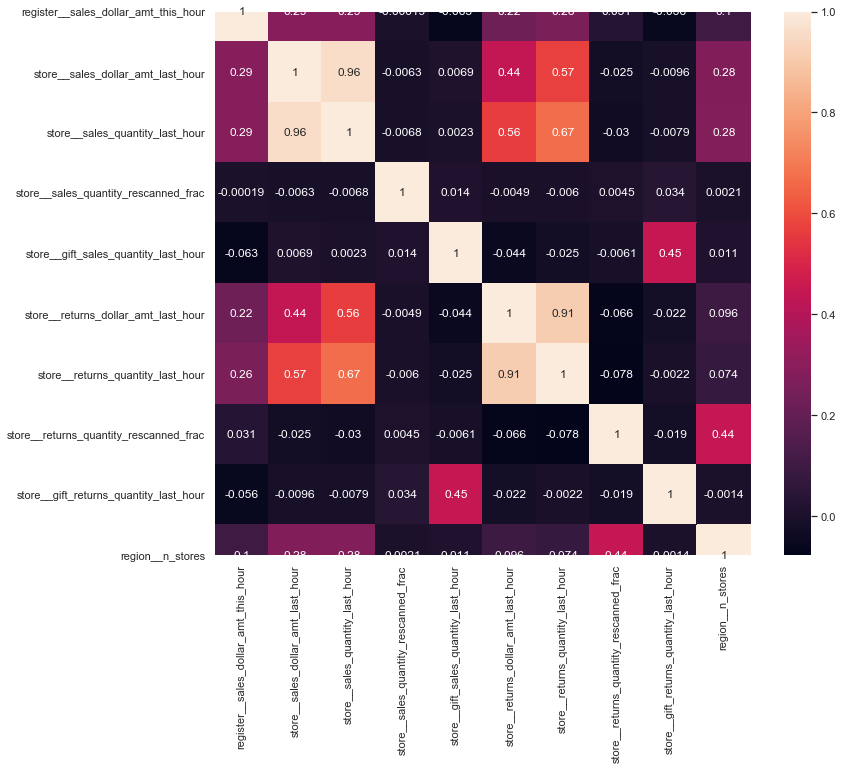

In [137]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','store__sales_dollar_amt_last_hour', 'store__sales_quantity_last_hour',
       'store__sales_quantity_rescanned_frac',
       'store__gift_sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'store__returns_quantity_rescanned_frac',
       'store__gift_returns_quantity_last_hour', 'region__n_stores']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

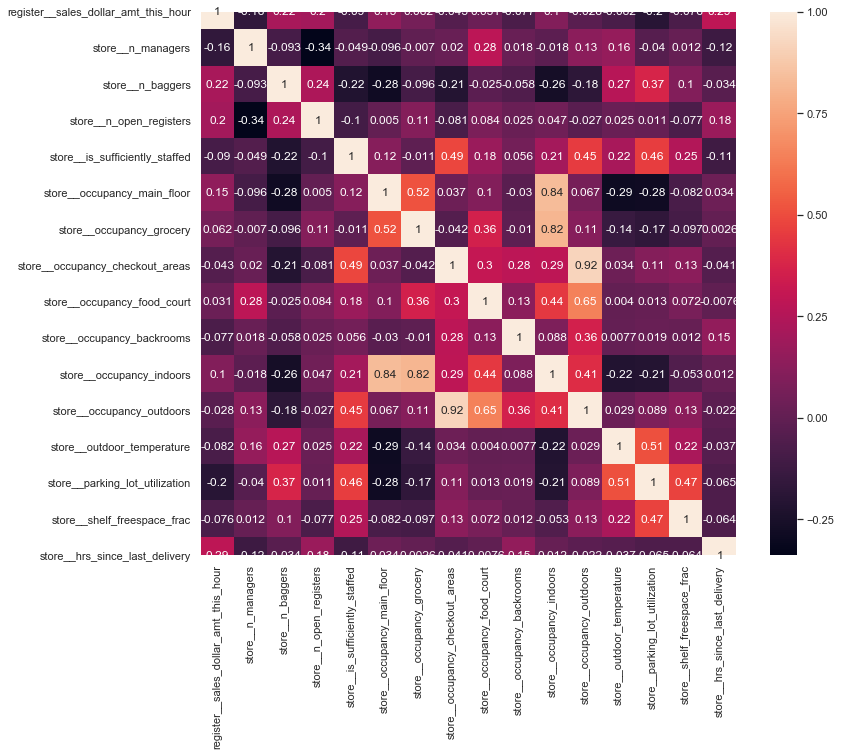

In [138]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour',
       'store__n_managers', 'store__n_baggers', 'store__n_open_registers',
       'store__is_sufficiently_staffed', 'store__occupancy_main_floor',
       'store__occupancy_grocery', 'store__occupancy_checkout_areas',
       'store__occupancy_food_court', 'store__occupancy_backrooms',
       'store__occupancy_indoors', 'store__occupancy_outdoors',
       'store__outdoor_temperature', 'store__parking_lot_utilization',
       'store__shelf_freespace_frac', 'store__hrs_since_last_delivery']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

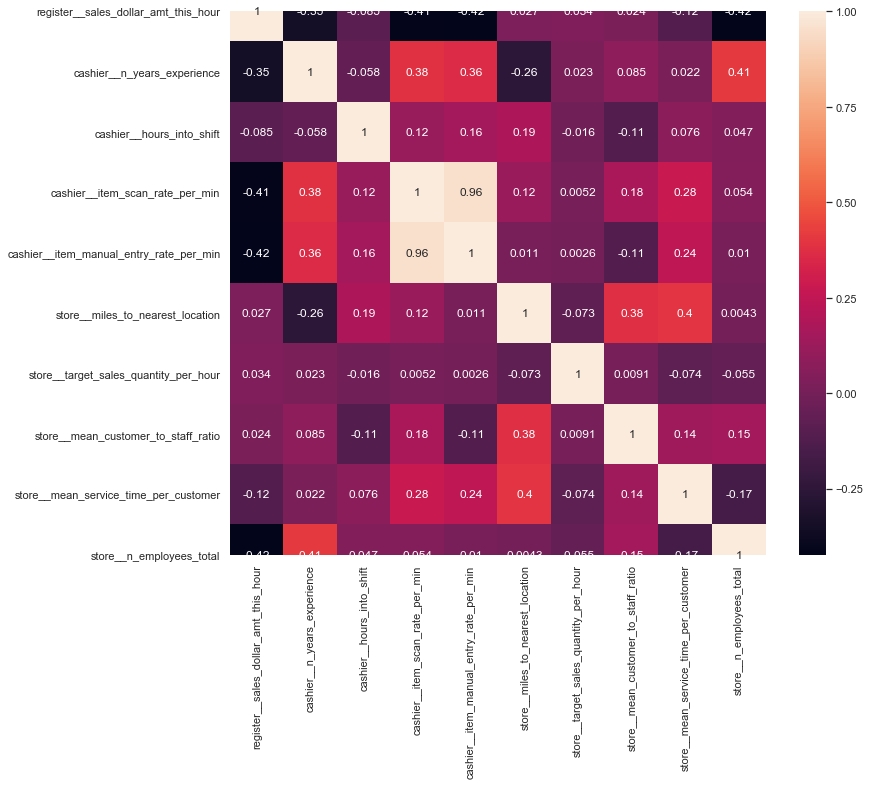

In [139]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 'store__n_employees_total']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (22,20)})

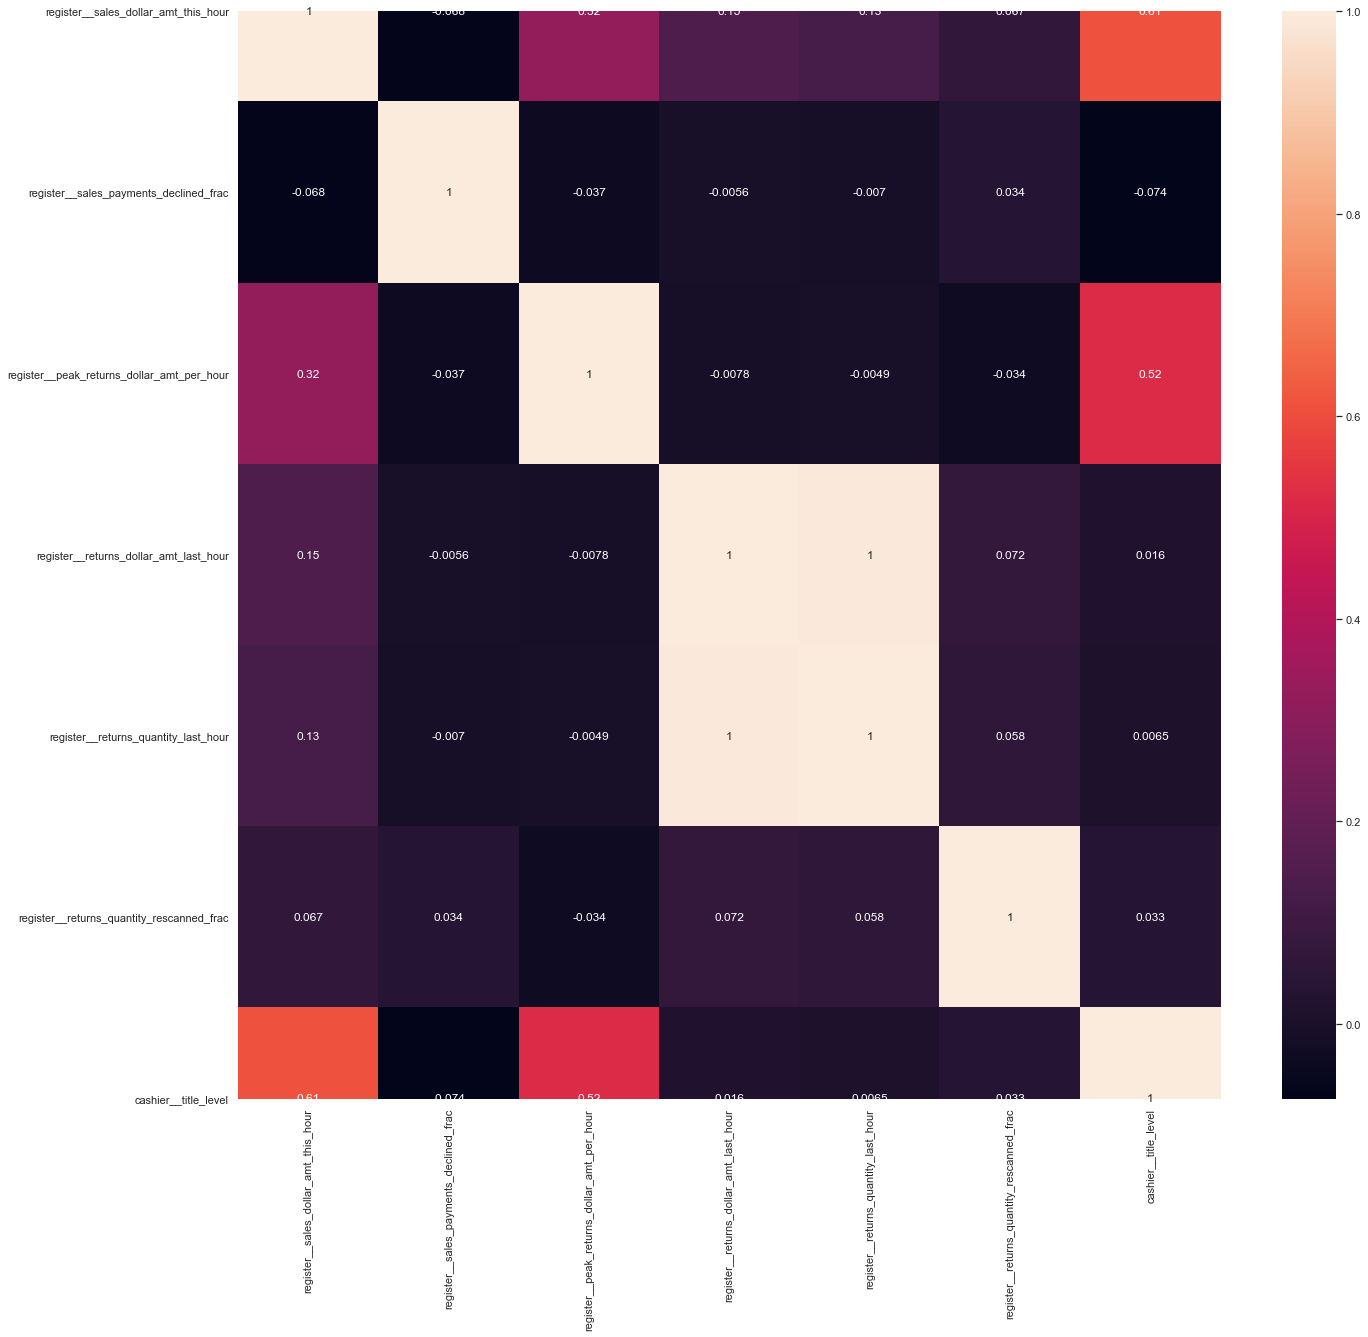

In [140]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

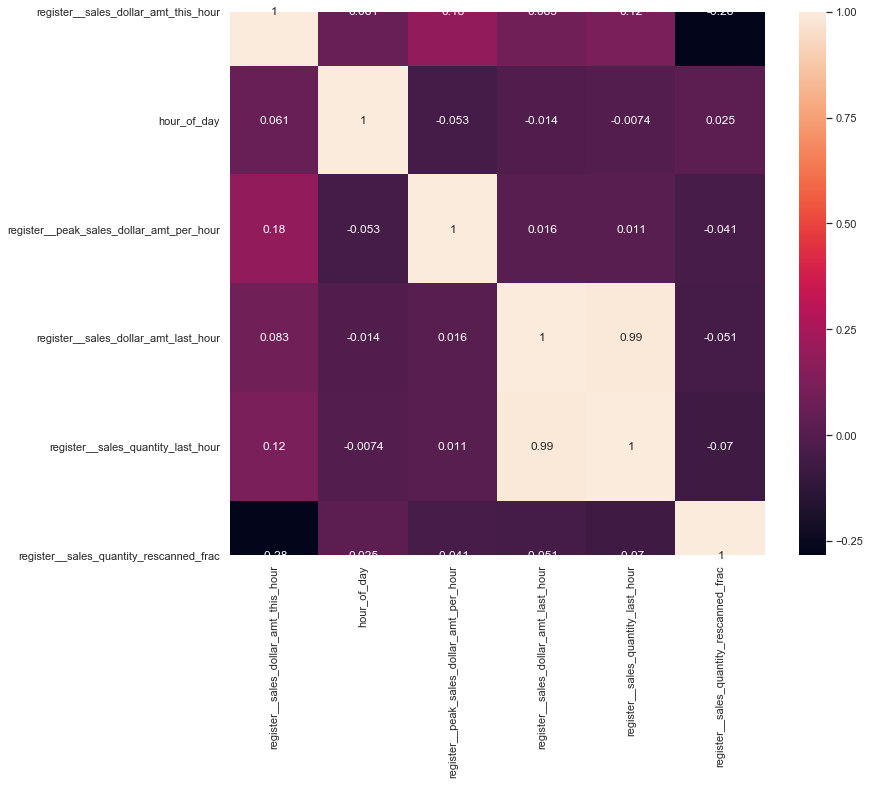

In [141]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','observation_timestamp', 'hour_of_day',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

In [142]:
DropColumns = ['region__nighttime_returns_amt_per_hour','region__peak_returns_dollar_amt_per_hour', 'register__sales_payments_declined_frac', 'register__returns_quantity_rescanned_frac', 'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min','store__mean_service_time_per_customer', 'store__n_employees_total', 'register__sales_quantity_rescanned_frac', 'store__n_baggers', 'store__is_sufficiently_staffed','store__occupancy_checkout_areas', 'store__occupancy_backrooms', 'store__occupancy_outdoors', 'store__outdoor_temperature', 'store__parking_lot_utilization',
       'store__shelf_freespace_frac', 'region__mean_service_time_per_customer',
       'region__stdev_service_time_per_customer','store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio','store__miles_to_nearest_location','store__occupancy_food_court','store__returns_quantity_rescanned_frac', 'register__peak_returns_dollar_amt_per_hour', 'region__nighttime_sales_amt_per_hour','store__occupancy_grocery','region__peak_sales_dollar_amt_per_hour_v2',
       'region__peak_returns_dollar_amt_per_hour_v2' , 'region__nighttime_open_registers',
       'region__nighttime_service_time_per_customer']
Train.drop(DropColumns, axis = 1, inplace = True)

In [143]:
Train.shape

(18512, 28)

In [144]:
Train.columns

Index(['observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour', 'cashier__title_level',
       'store__type_code', 'store__n_managers', 'store__n_open_registers',
       'store__occupancy_main_floor', 'store__occupancy_indoors',
       'store__hrs_since_last_delivery', 'store__sales_dollar_amt_last_hour',
       'store__sales_quantity_last_hour',
       'store__sales_quantity_rescanned_frac',
       'store__gift_sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'store__gift_returns_quantity_last_hour', 'region__n_stores',
       'region__n_open_registers', 'region__sales_dollar_amt_last_hour',
       'regio

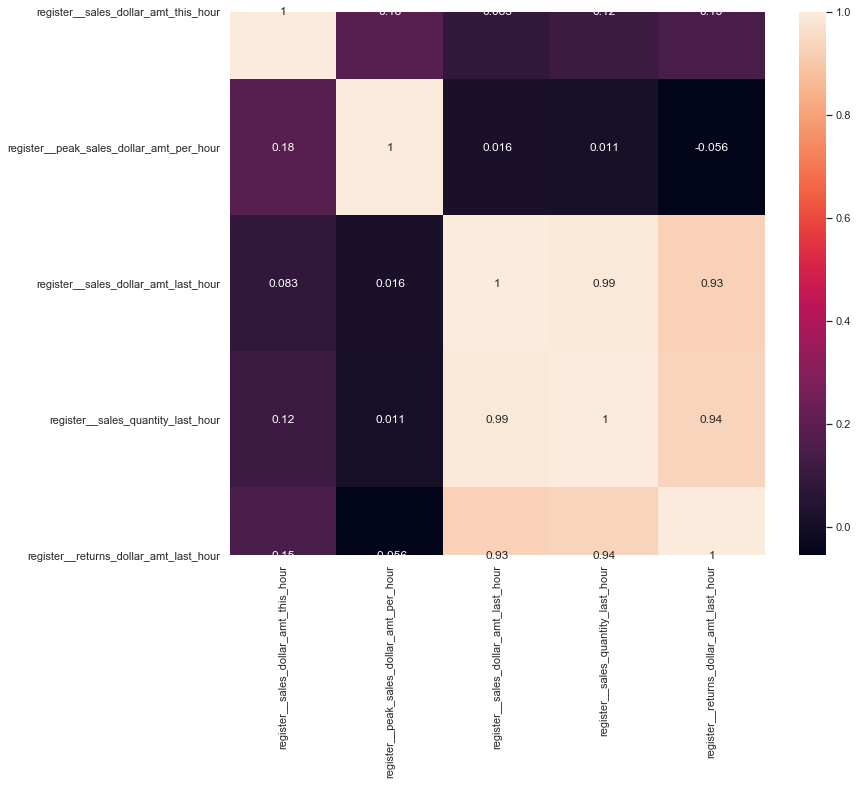

In [145]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__returns_dollar_amt_last_hour',]].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

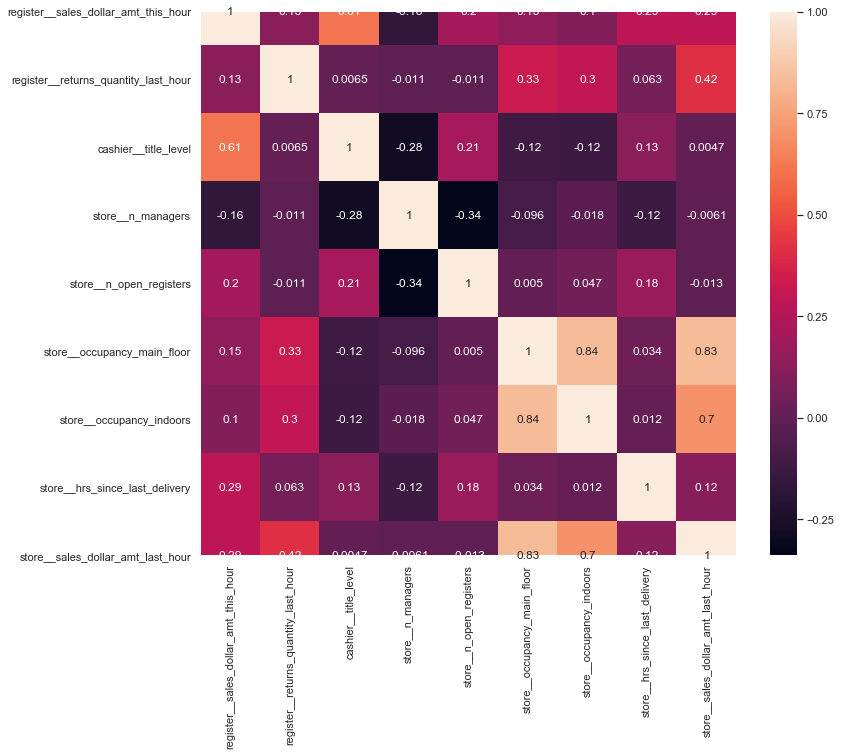

In [146]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','register__returns_quantity_last_hour', 'cashier__title_level',
       'store__type_code', 'store__n_managers', 'store__n_open_registers',
       'store__occupancy_main_floor', 'store__occupancy_indoors',
       'store__hrs_since_last_delivery', 'store__sales_dollar_amt_last_hour']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

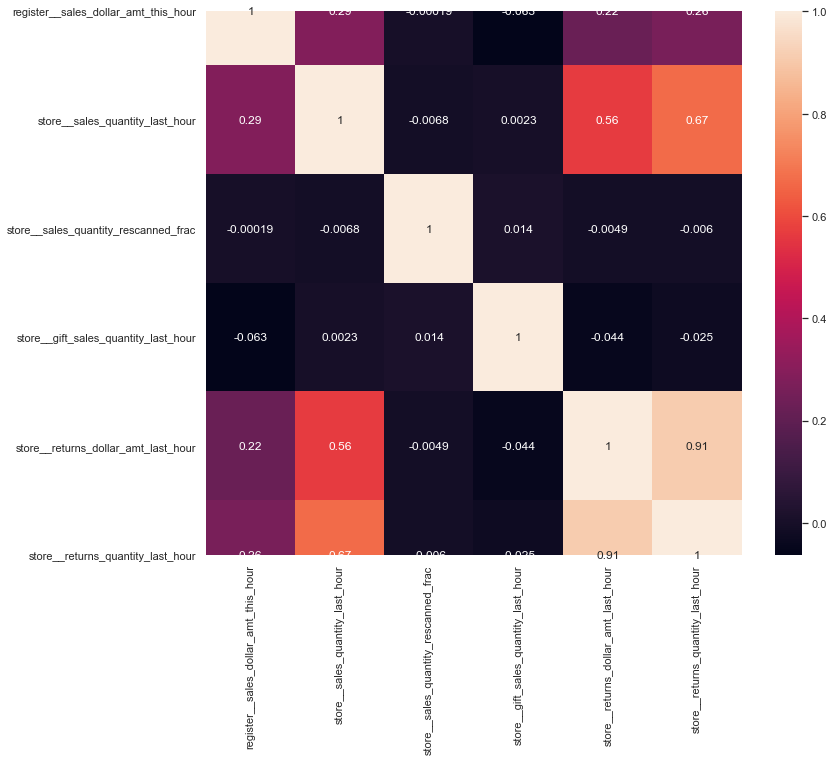

In [147]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour','store__sales_quantity_last_hour',
       'store__sales_quantity_rescanned_frac',
       'store__gift_sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

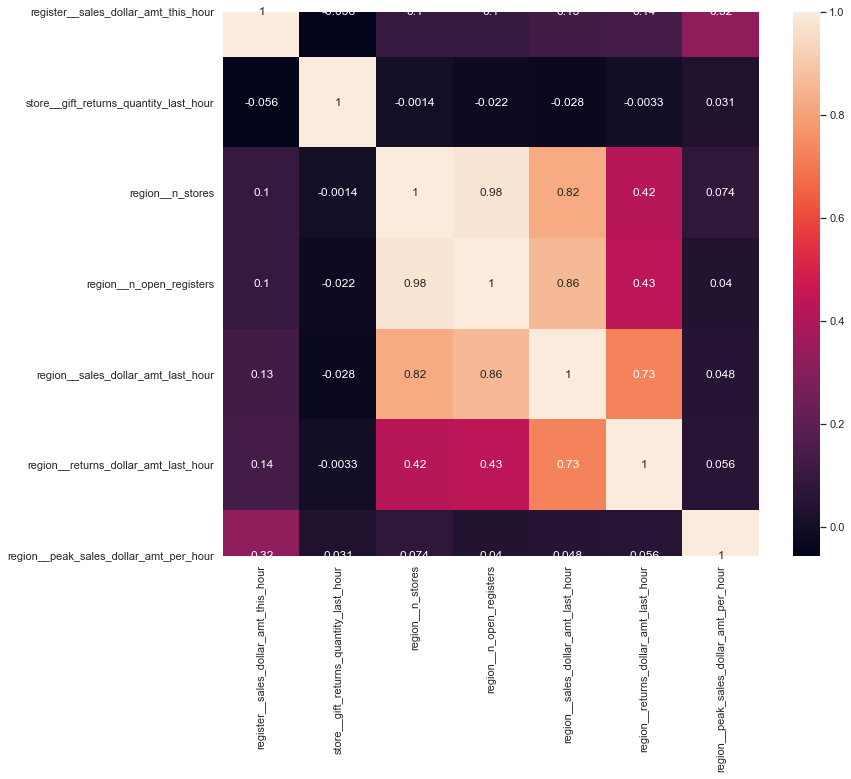

In [148]:
HeatMap = sns.heatmap(Train[['register__sales_dollar_amt_this_hour', 'store__gift_returns_quantity_last_hour', 'region__n_stores',
       'region__n_open_registers', 'region__sales_dollar_amt_last_hour',
       'region__returns_dollar_amt_last_hour',
       'region__peak_sales_dollar_amt_per_hour']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

In [149]:
DropColumns = [ 'store__gift_returns_quantity_last_hour', 'region__n_stores',
       'region__n_open_registers', 'region__sales_dollar_amt_last_hour',
       'region__returns_dollar_amt_last_hour','store__sales_quantity_rescanned_frac',
       'store__gift_sales_quantity_last_hour', 'store__occupancy_main_floor', 'store__occupancy_indoors','store__type_code', 'store__n_managers','register__returns_quantity_last_hour', 'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__returns_dollar_amt_last_hour'
]
Train.drop(DropColumns, axis = 1, inplace = True)

In [150]:
Train.shape

(18512, 12)

In [151]:
Train.columns

Index(['observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted', 'cashier__title_level',
       'store__n_open_registers', 'store__hrs_since_last_delivery',
       'store__sales_dollar_amt_last_hour', 'store__sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'region__peak_sales_dollar_amt_per_hour'],
      dtype='object')

In [152]:
DropColumns = [ 'hour_of_day'
]
Train.drop(DropColumns, axis = 1, inplace = True)

# Attributes that Clearly Affected the Sales in the hour¶

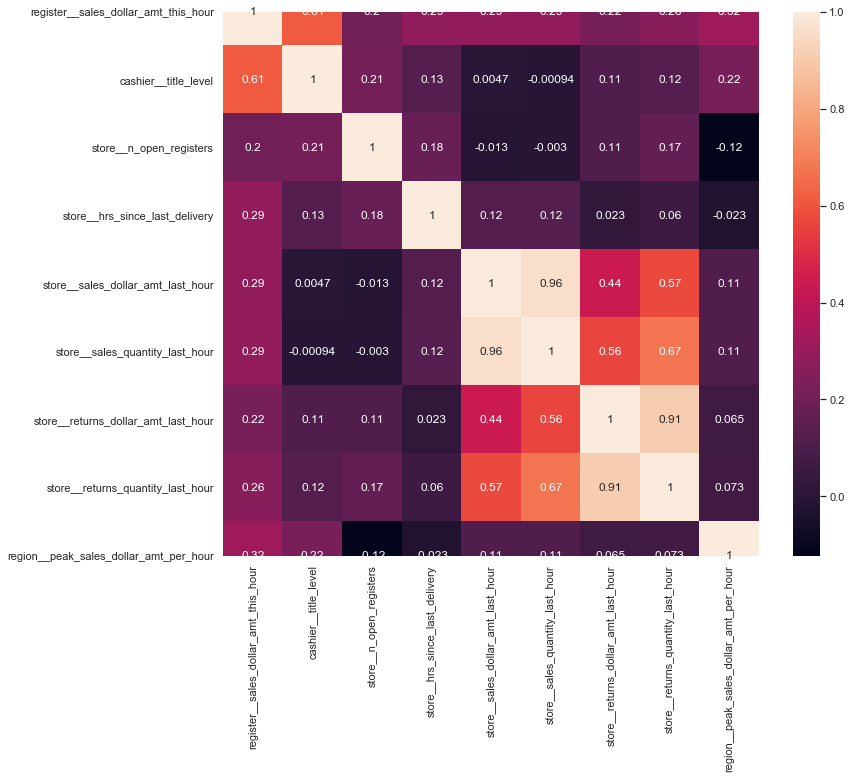

In [154]:
HeatMap = sns.heatmap(Train[['observation_timestamp', 'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted', 'cashier__title_level',
       'store__n_open_registers', 'store__hrs_since_last_delivery',
       'store__sales_dollar_amt_last_hour', 'store__sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'region__peak_sales_dollar_amt_per_hour']].corr(), annot = True)
sns.set(rc = {'figure.figsize': (12,10)})

In [155]:
Train.describe(include="all")

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
count,18512,18512.000000,18512,18512.000000,18512.000000,18512.000000,18512.000000,18512.000000,18512.000000,18512.000000,18512.000000
unique,18460,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-05-19 20:42:58,NaN,Cash+Credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,16310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1169.814248,NaN,-0.001829,0.014078,-0.010074,0.002377,0.002736,-0.001778,-0.000283,-0.019027
std,NaN,818.455239,NaN,1.005457,1.006427,0.996157,1.011207,1.012666,1.006207,1.011181,0.996364
min,NaN,15.710000,NaN,-2.603600,-0.753600,-1.180400,-0.549300,-0.595900,-0.434500,-0.547700,-2.259200
25%,NaN,369.160000,NaN,-0.352000,-0.753600,-0.496425,-0.548300,-0.589700,-0.432500,-0.532200,-0.420900
50%,NaN,1165.795000,NaN,-0.352000,-0.405700,-0.215300,-0.520000,-0.501950,-0.413200,-0.397400,0.033200
75%,NaN,1457.487500,NaN,-0.352000,0.290000,0.171625,0.108125,0.092375,-0.091775,0.022125,0.499800


# Data Wrangling / Analysis

In [157]:
Train.register__payment_types_accepted.nunique()

3

In [158]:
Train.register__payment_types_accepted.unique()

array(['Cash+Credit', 'Credit', 'Cash+Credit+Check'], dtype=object)

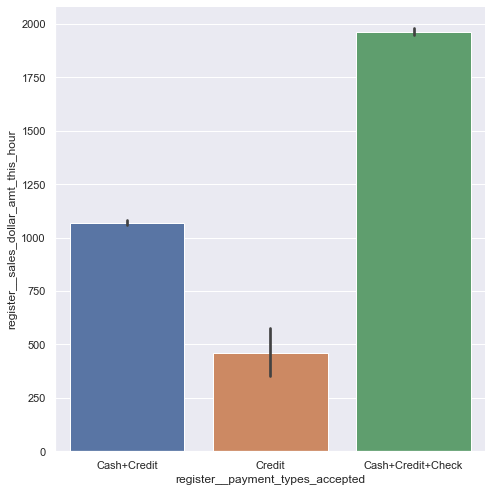

In [159]:
ClassPlot = sns.catplot(x= 'register__payment_types_accepted', y = 'register__sales_dollar_amt_this_hour', data = Train, kind = 'bar', height = 7)

In [160]:
Train.isnull().sum()

observation_timestamp                     0
register__sales_dollar_amt_this_hour      0
register__payment_types_accepted          0
cashier__title_level                      0
store__n_open_registers                   0
store__hrs_since_last_delivery            0
store__sales_dollar_amt_last_hour         0
store__sales_quantity_last_hour           0
store__returns_dollar_amt_last_hour       0
store__returns_quantity_last_hour         0
region__peak_sales_dollar_amt_per_hour    0
dtype: int64

In [161]:
Train.duplicated().sum()

0

In [162]:
Train.head()

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
0,2022-05-16 15:39:57,347.29,Cash+Credit,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773
1,2022-06-07 21:52:23,361.59,Cash+Credit,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998
2,2022-05-14 11:38:52,850.73,Cash+Credit,-0.3520,-0.7536,-0.8367,-0.5488,-0.5921,-0.4335,-0.5391,1.9337
3,2022-07-26 10:02:41,1175.69,Cash+Credit,-0.3520,-0.7536,0.0550,-0.5492,-0.5956,-0.4343,-0.5438,0.1288
4,2022-05-17 14:33:50,3204.53,Cash+Credit,1.8996,-0.2318,2.7499,-0.5457,-0.5774,-0.4189,-0.4578,1.0050


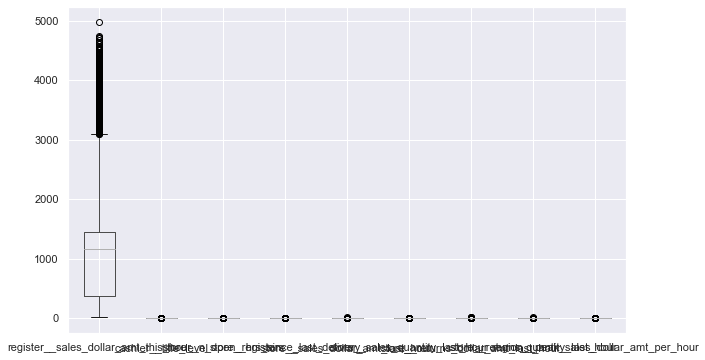

In [163]:
Train.boxplot(figsize=(10,6))

# Checking For Outliers

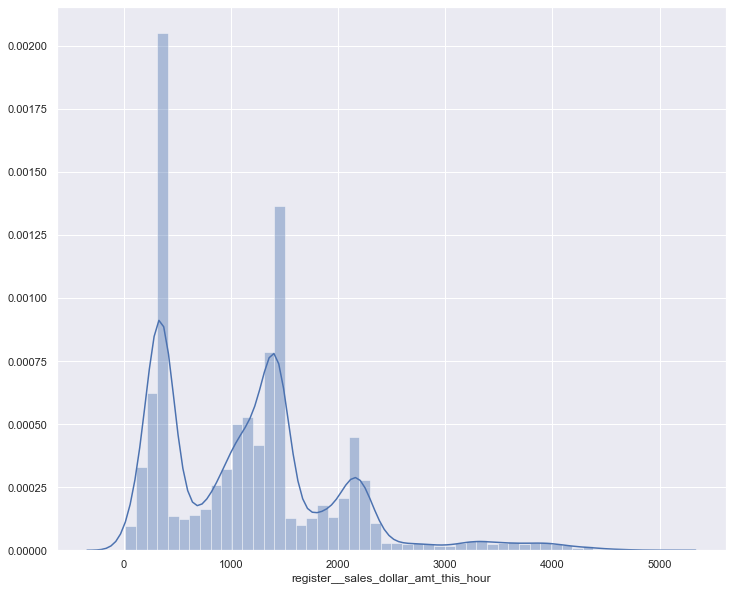

In [165]:
sns.distplot(Train['register__sales_dollar_amt_this_hour'])

In [166]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = Train['register__sales_dollar_amt_this_hour'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = Train[Train['register__sales_dollar_amt_this_hour'] < q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
count,18326,18326.000000,18326,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000,18326.000000
unique,18277,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-05-17 17:57:35,NaN,Cash+Credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,16124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1139.190930,NaN,-0.016459,0.016944,-0.029768,-0.005719,-0.007299,-0.014578,-0.010364,-0.032968
std,NaN,763.477349,NaN,0.995759,1.010967,0.972076,0.987104,0.987163,0.937048,0.981104,0.989545
min,NaN,15.710000,NaN,-2.603600,-0.753600,-1.180400,-0.549300,-0.595900,-0.434500,-0.547700,-2.259200
25%,NaN,369.030000,NaN,-0.352000,-0.753600,-0.498775,-0.548400,-0.590000,-0.432600,-0.532600,-0.420900
50%,NaN,1157.895000,NaN,-0.352000,-0.405700,-0.217300,-0.519900,-0.501900,-0.413700,-0.398300,0.033200
75%,NaN,1454.467500,NaN,-0.352000,0.290000,0.164575,0.100775,0.083875,-0.093000,0.017275,0.499800


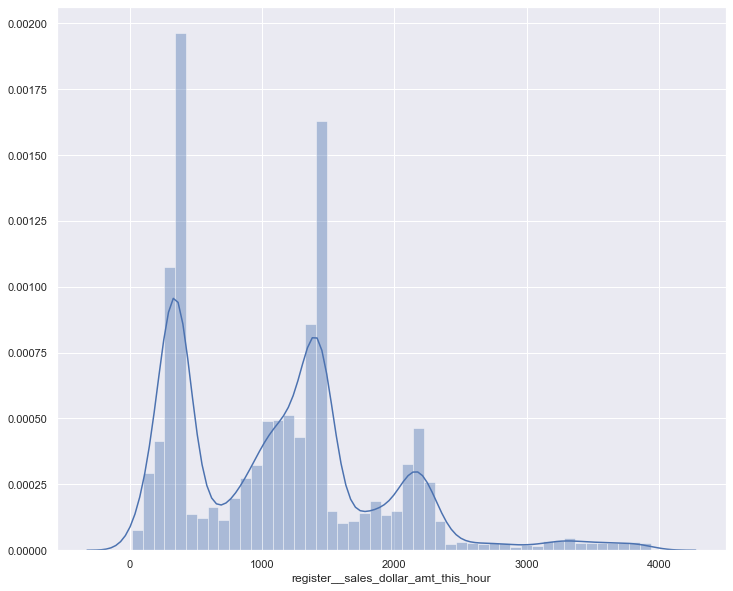

In [167]:
sns.distplot(data_1['register__sales_dollar_amt_this_hour'])

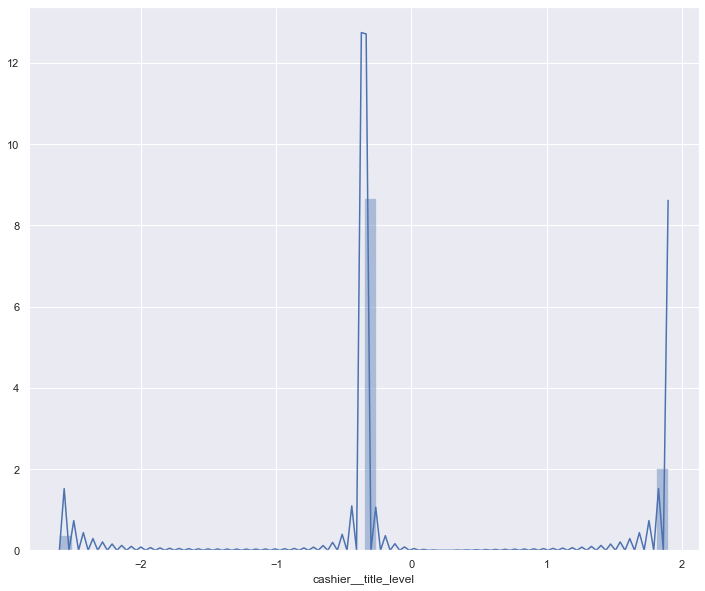

In [168]:
sns.distplot(data_1['cashier__title_level'])

In [169]:
q = data_1['cashier__title_level'].quantile(0.99)
data_2 = data_1[data_1['cashier__title_level'] < q]

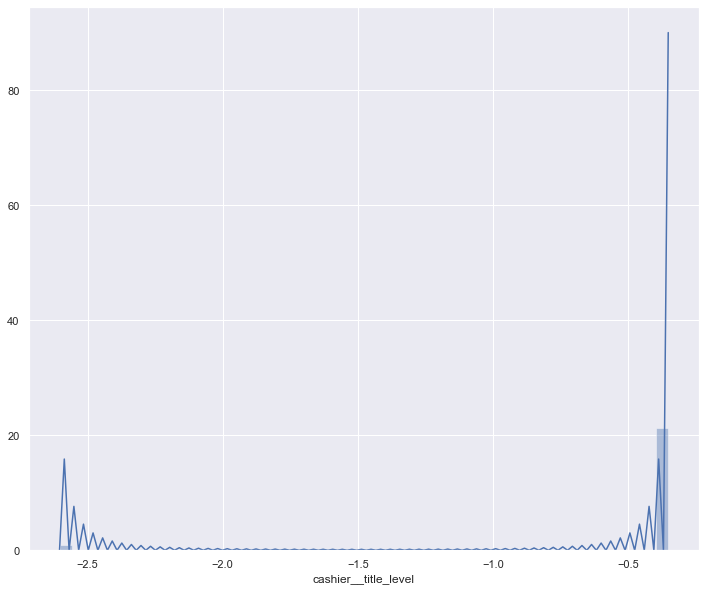

In [170]:
sns.distplot(data_2['cashier__title_level'])

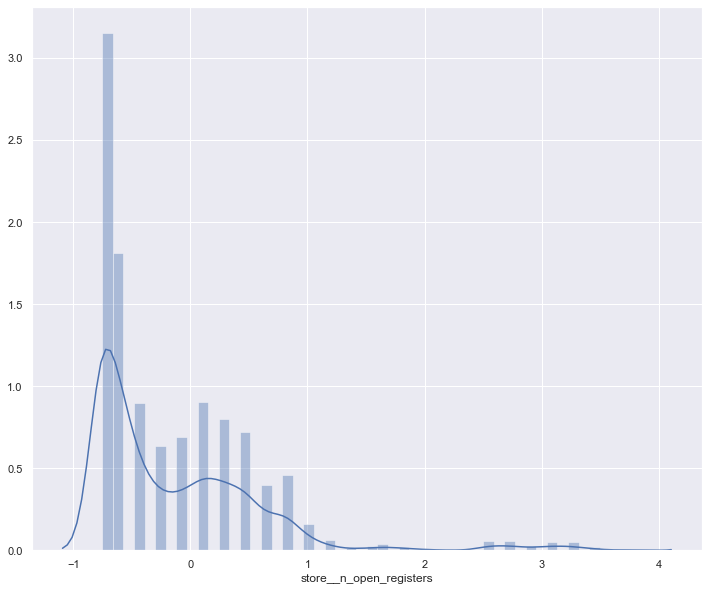

In [171]:
sns.distplot(data_2['store__n_open_registers'])

In [172]:
# I'll simply remove them
q = data_2['store__n_open_registers'].quantile(0.01)
data_3 = data_2[data_2['store__n_open_registers']>q]

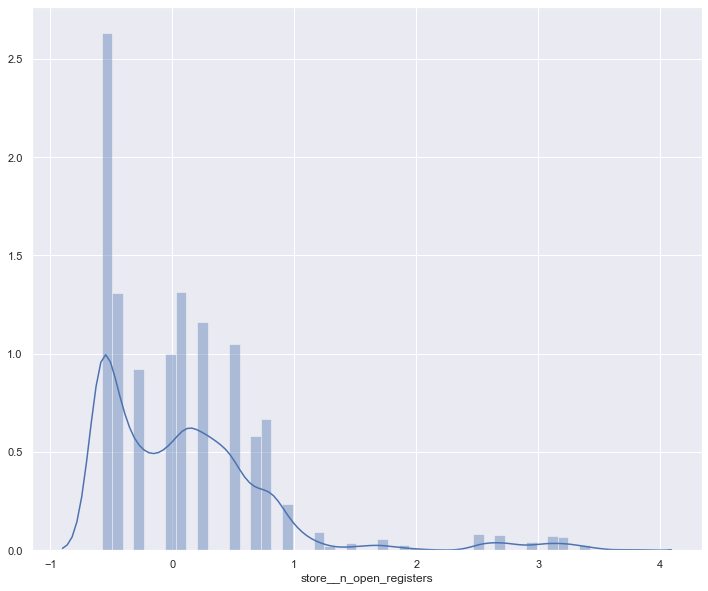

In [173]:
sns.distplot(data_3['store__n_open_registers'])

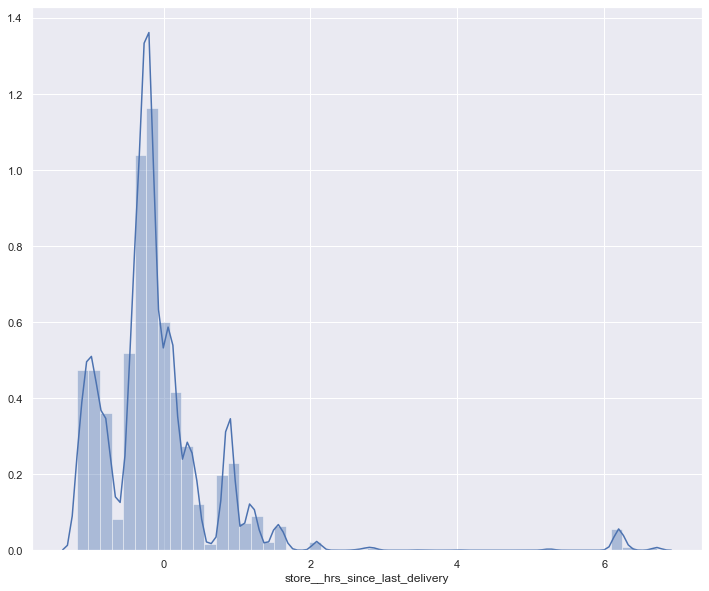

In [174]:
sns.distplot(data_3['store__hrs_since_last_delivery'])

In [175]:
q = data_3['store__hrs_since_last_delivery'].quantile(0.01)
data_4 = data_3[data_3['store__hrs_since_last_delivery']>q]

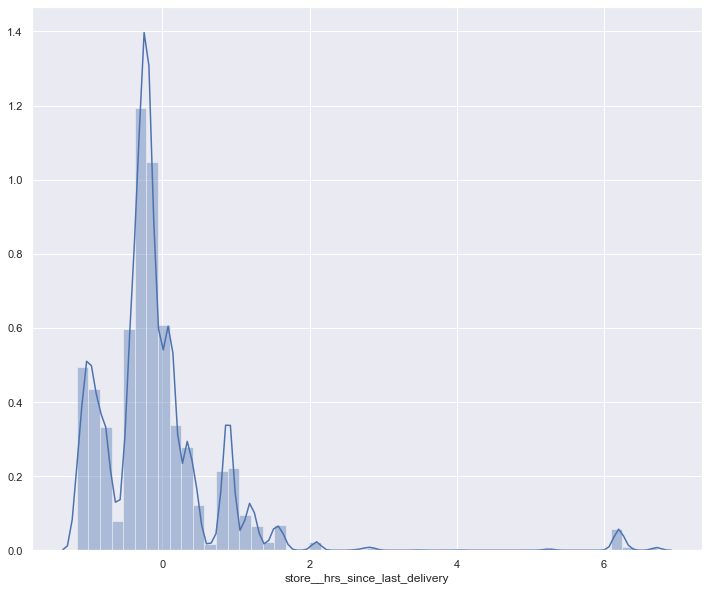

In [176]:
sns.distplot(data_4['store__hrs_since_last_delivery'])

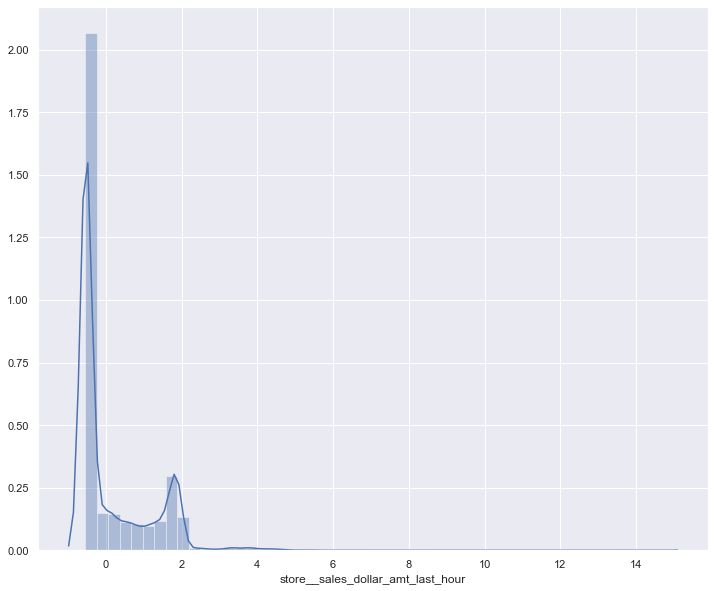

In [177]:
sns.distplot(data_4['store__sales_dollar_amt_last_hour'])

In [178]:
q = data_4['store__sales_dollar_amt_last_hour'].quantile(0.01)
data_5 = data_4[data_4['store__sales_dollar_amt_last_hour']>q]

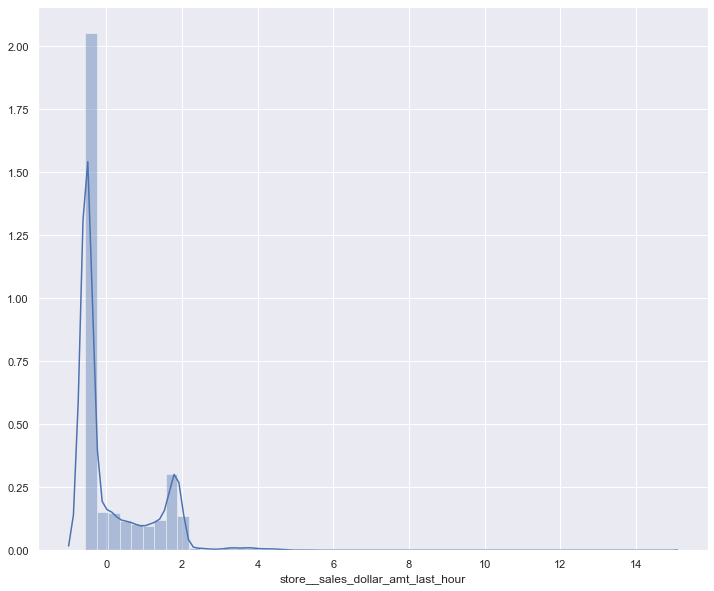

In [179]:
sns.distplot(data_5['store__sales_dollar_amt_last_hour'])

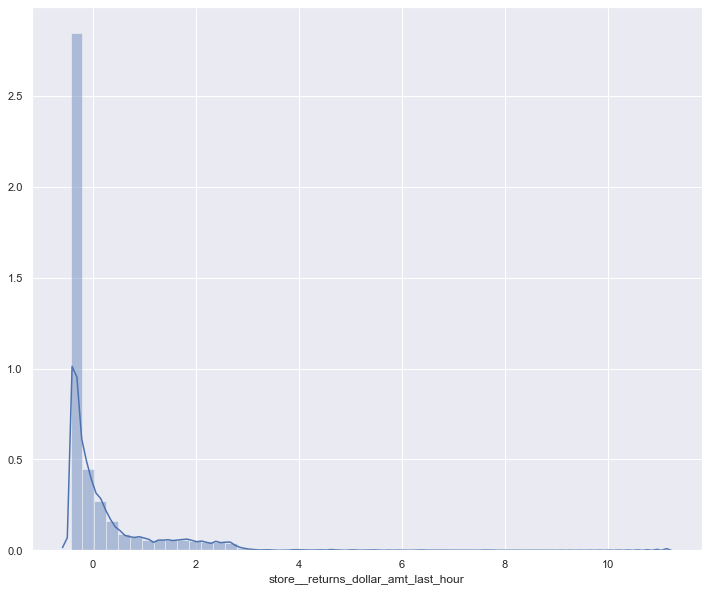

In [180]:
sns.distplot(data_4['store__returns_dollar_amt_last_hour'])

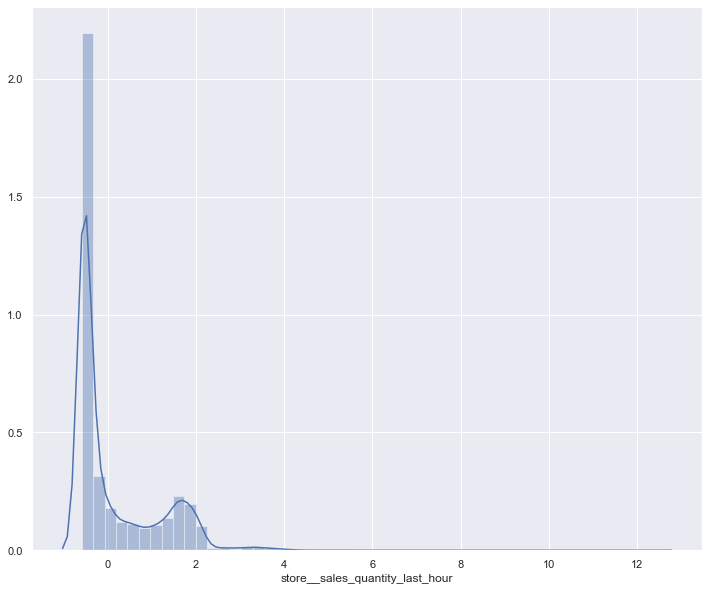

In [181]:
sns.distplot(data_4['store__sales_quantity_last_hour'])

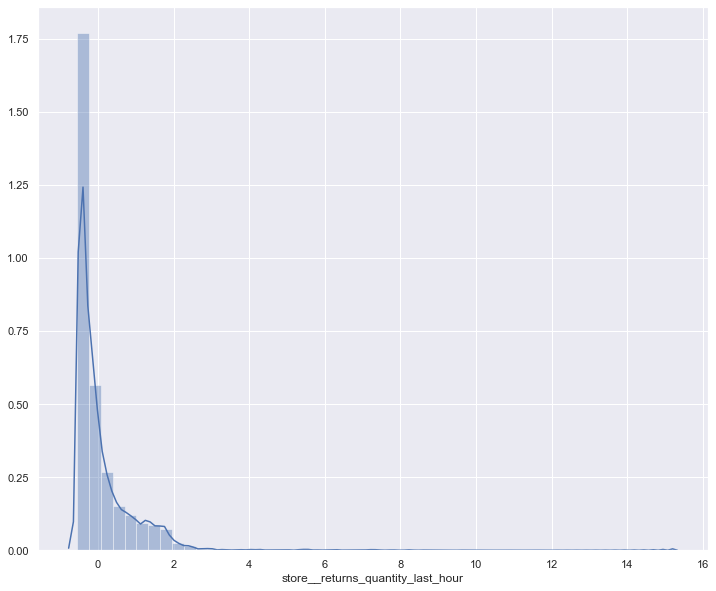

In [182]:
sns.distplot(data_4['store__returns_quantity_last_hour'])

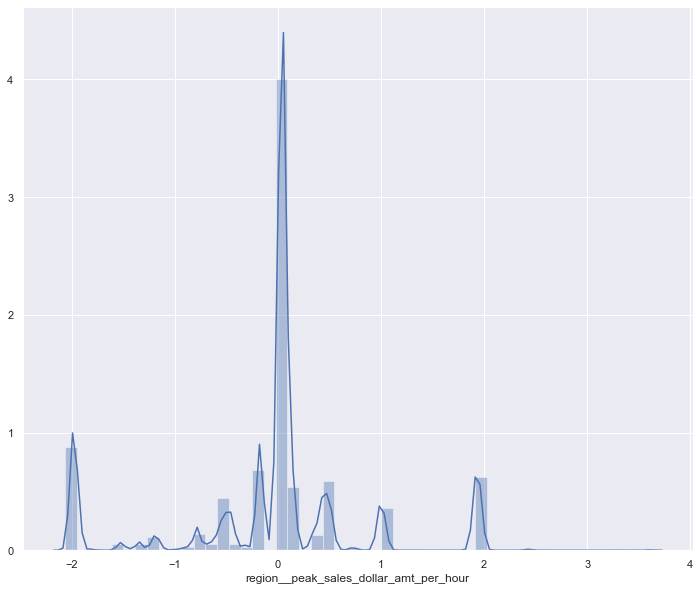

In [183]:
sns.distplot(data_4['region__peak_sales_dollar_amt_per_hour'])

In [184]:
data_cleaned = data_5.reset_index(drop=True)

In [185]:
data_cleaned.describe(include='all')

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
count,10469,10469.000000,10469,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
unique,10455,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-05-16 16:58:20,NaN,Cash+Credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,10418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1046.286601,NaN,-0.484055,0.119440,-0.075505,0.118993,0.119209,-0.005397,0.003225,-0.060218
std,NaN,548.404316,NaN,0.529077,0.732478,0.918631,1.000017,0.968565,0.817567,0.818914,0.891495
min,NaN,15.710000,NaN,-2.603600,-0.579600,-1.164200,-0.549200,-0.595900,-0.434500,-0.547500,-2.065800
25%,NaN,456.950000,NaN,-0.352000,-0.405700,-0.424600,-0.540900,-0.551800,-0.427800,-0.476100,-0.173300
50%,NaN,1165.210000,NaN,-0.352000,-0.057800,-0.212200,-0.509500,-0.440800,-0.376400,-0.294800,0.033200
75%,NaN,1421.700000,NaN,-0.352000,0.464000,0.090600,0.664400,0.656600,0.005700,0.142600,0.062100


In [186]:
data_cleaned.head()

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
0,2022-05-16 15:39:57,347.29,Cash+Credit,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773
1,2022-06-07 21:52:23,361.59,Cash+Credit,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998
2,2022-04-28 23:42:35,614.13,Credit,-2.6036,0.8118,-1.0319,-0.5489,-0.5946,-0.4338,-0.5441,1.0020
3,2022-05-17 20:19:32,296.79,Cash+Credit,-0.3520,0.9857,-1.0545,-0.1426,-0.0784,-0.1418,0.2099,1.9337
4,2022-05-31 15:14:25,1113.77,Cash+Credit,-0.3520,-0.2318,0.8322,-0.4947,-0.4424,-0.3221,-0.3678,0.0332


# Checking For Multicollinearity

In [187]:
# sklearn does not have a built-in way to check for multicollinearity

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['cashier__title_level', 'store__n_open_registers', 'store__hrs_since_last_delivery', 'store__sales_dollar_amt_last_hour', 'store__sales_quantity_last_hour', 'store__returns_dollar_amt_last_hour', 'store__returns_quantity_last_hour', 'region__peak_sales_dollar_amt_per_hour' ]]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [188]:
# Let's explore the result
vif

,VIF,Features
0,1.185018,cashier__title_level
1,1.386289,store__n_open_registers
2,1.348191,store__hrs_since_last_delivery
3,22.767499,store__sales_dollar_amt_last_hour
4,27.545950,store__sales_quantity_last_hour
5,7.301994,store__returns_dollar_amt_last_hour
6,8.559540,store__returns_quantity_last_hour
7,1.122414,region__peak_sales_dollar_amt_per_hour


In [189]:
data_cleaned.head()

,observation_timestamp,register__sales_dollar_amt_this_hour,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
0,2022-05-16 15:39:57,347.29,Cash+Credit,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773
1,2022-06-07 21:52:23,361.59,Cash+Credit,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998
2,2022-04-28 23:42:35,614.13,Credit,-2.6036,0.8118,-1.0319,-0.5489,-0.5946,-0.4338,-0.5441,1.0020
3,2022-05-17 20:19:32,296.79,Cash+Credit,-0.3520,0.9857,-1.0545,-0.1426,-0.0784,-0.1418,0.2099,1.9337
4,2022-05-31 15:14:25,1113.77,Cash+Credit,-0.3520,-0.2318,0.8322,-0.4947,-0.4424,-0.3221,-0.3678,0.0332


In [190]:
data_cleaned.duplicated().sum()

0

In [191]:
DropColumns = ['observation_timestamp']
data_cleaned.drop(DropColumns, axis = 1, inplace = True)

# Categorical Features Encoding

In [192]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

data_with_dum = pd.get_dummies(data_cleaned, drop_first = False)
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)

In [193]:
data_with_dummies.head()

,register__sales_dollar_amt_this_hour,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour,register__payment_types_accepted_Credit
0,347.29,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773,0
1,361.59,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998,0
2,614.13,-2.6036,0.8118,-1.0319,-0.5489,-0.5946,-0.4338,-0.5441,1.0020,1
3,296.79,-0.3520,0.9857,-1.0545,-0.1426,-0.0784,-0.1418,0.2099,1.9337,0
4,1113.77,-0.3520,-0.2318,0.8322,-0.4947,-0.4424,-0.3221,-0.3678,0.0332,0


In [194]:
data_with_dummies.columns.values

array(['register__sales_dollar_amt_this_hour', 'cashier__title_level',
       'store__n_open_registers', 'store__hrs_since_last_delivery',
       'store__sales_dollar_amt_last_hour',
       'store__sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'region__peak_sales_dollar_amt_per_hour',
       'register__payment_types_accepted_Credit'], dtype=object)

In [195]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['register__sales_dollar_amt_this_hour', 'cashier__title_level',
       'store__n_open_registers', 'store__hrs_since_last_delivery',
       'store__sales_dollar_amt_last_hour',
       'store__sales_quantity_last_hour',
       'store__returns_dollar_amt_last_hour',
       'store__returns_quantity_last_hour',
       'region__peak_sales_dollar_amt_per_hour',
       'register__payment_types_accepted_Credit']

In [196]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,register__sales_dollar_amt_this_hour,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour,register__payment_types_accepted_Credit
0,347.29,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773,0
1,361.59,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998,0
2,614.13,-2.6036,0.8118,-1.0319,-0.5489,-0.5946,-0.4338,-0.5441,1.0020,1
3,296.79,-0.3520,0.9857,-1.0545,-0.1426,-0.0784,-0.1418,0.2099,1.9337,0
4,1113.77,-0.3520,-0.2318,0.8322,-0.4947,-0.4424,-0.3221,-0.3678,0.0332,0


In [197]:
# Lets check for multicolliniearity after converting dummies to numerical 


variables = data_preprocessed.drop(['register__sales_dollar_amt_this_hour'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.287628,cashier__title_level
1,1.387676,store__n_open_registers
2,1.451259,store__hrs_since_last_delivery
3,22.799856,store__sales_dollar_amt_last_hour
4,27.617996,store__sales_quantity_last_hour
5,7.305171,store__returns_dollar_amt_last_hour
6,8.560057,store__returns_quantity_last_hour
7,1.132571,region__peak_sales_dollar_amt_per_hour
8,1.165815,register__payment_types_accepted_Credit


# Specifying Target and Input Features

In [198]:
target = data_preprocessed['register__sales_dollar_amt_this_hour']
inputs = data_preprocessed.drop(['register__sales_dollar_amt_this_hour'], axis = 1)

In [199]:
 data_preprocessed.head()

,register__sales_dollar_amt_this_hour,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour,register__payment_types_accepted_Credit
0,347.29,-2.6036,0.4640,-0.3093,-0.5487,-0.5871,-0.4308,-0.5274,-0.4773,0
1,361.59,-0.3520,-0.5796,-1.1059,-0.4608,-0.3796,-0.1632,-0.2623,0.4998,0
2,614.13,-2.6036,0.8118,-1.0319,-0.5489,-0.5946,-0.4338,-0.5441,1.0020,1
3,296.79,-0.3520,0.9857,-1.0545,-0.1426,-0.0784,-0.1418,0.2099,1.9337,0
4,1113.77,-0.3520,-0.2318,0.8322,-0.4947,-0.4424,-0.3221,-0.3678,0.0332,0


# Scaling

In [200]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [201]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

# Splitting our Data

In [202]:
from sklearn.model_selection import train_test_split 

In [203]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state =365)

In [204]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8375, 9) (2094, 9)
(8375,) (2094,)


# Random Forest Regressor Algorithm

RandomForestRegressor() 

MSE: 26285.608102214854
RMSE: 162.1283692085221
R2: 0.910360726909052


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


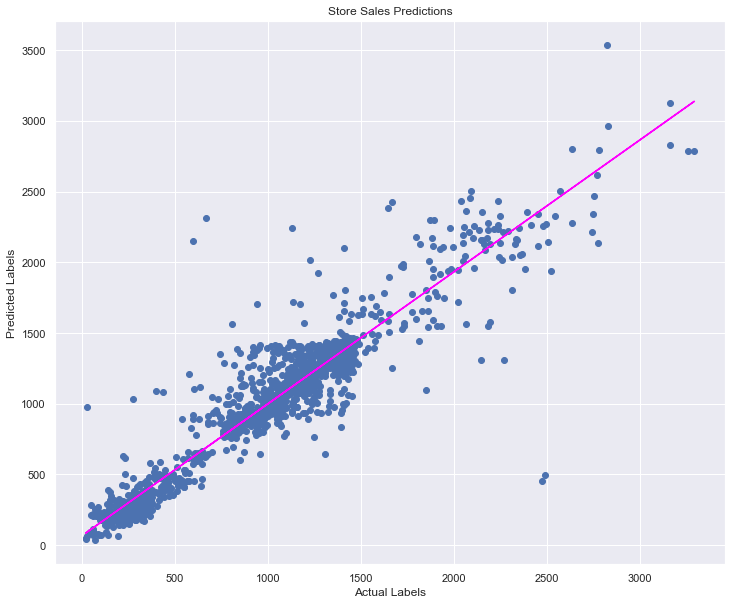

In [214]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model1 = RandomForestRegressor().fit(x_train, y_train)
print (model1, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model1.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Store Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# KNeighbors Regressor Algorithm

KNeighborsRegressor() 

MSE: 41736.427314231136
RMSE: 204.2949517590465
R2: 0.8576702889538392


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


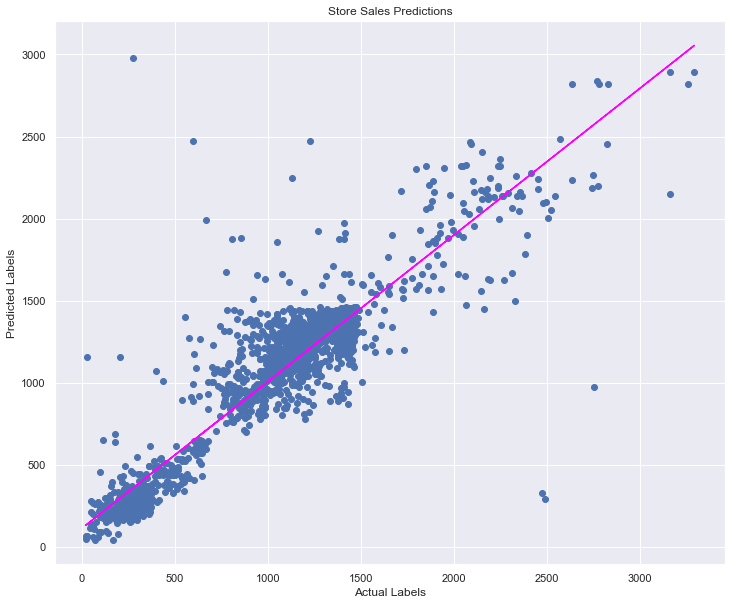

In [215]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
model3 = KNeighborsRegressor().fit(x_train, y_train)
print (model3, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model3.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Store Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Support Vector Machine Algorithm

SVR() 

MSE: 165122.26207031898
RMSE: 406.3523865689963
R2: 0.4368994818168497


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


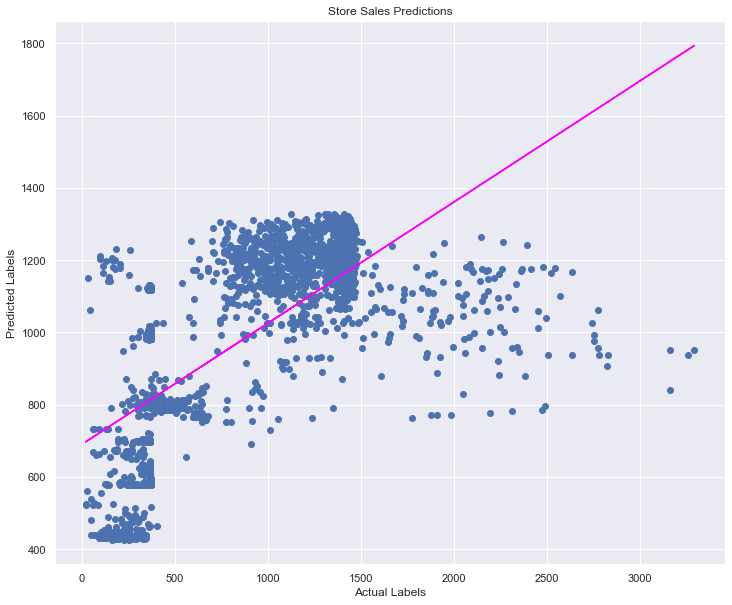

In [213]:
from sklearn.svm import SVR

# Train the model
model2 = SVR().fit(x_train, y_train)
print (model2, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model2.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Store Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Gradient Boosting Regressor Algorithm

GradientBoostingRegressor() 

MSE: 40629.89188184701
RMSE: 201.56857860749778
R2: 0.8614437999725907


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


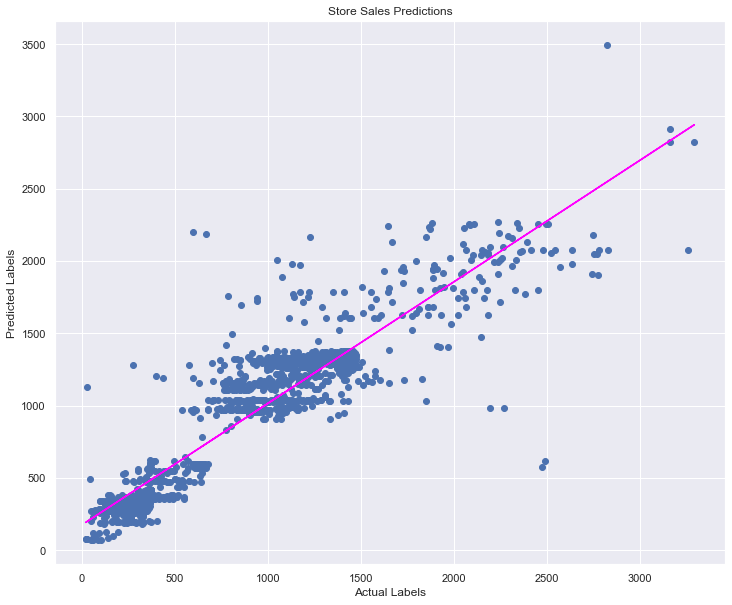

In [211]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model4 = GradientBoostingRegressor().fit(x_train, y_train)
print (model4, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model4.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Store Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#  Parameter Tuning in Gradient Boosting Algorithm

Best parameter combination: {'learning_rate': 0.35, 'n_estimators': 150} 

GradientBoostingRegressor(learning_rate=0.35, n_estimators=150) 

MSE: 27091.315528070863
RMSE: 164.5943970129933
R2: 0.907613100614965


C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mnesoma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


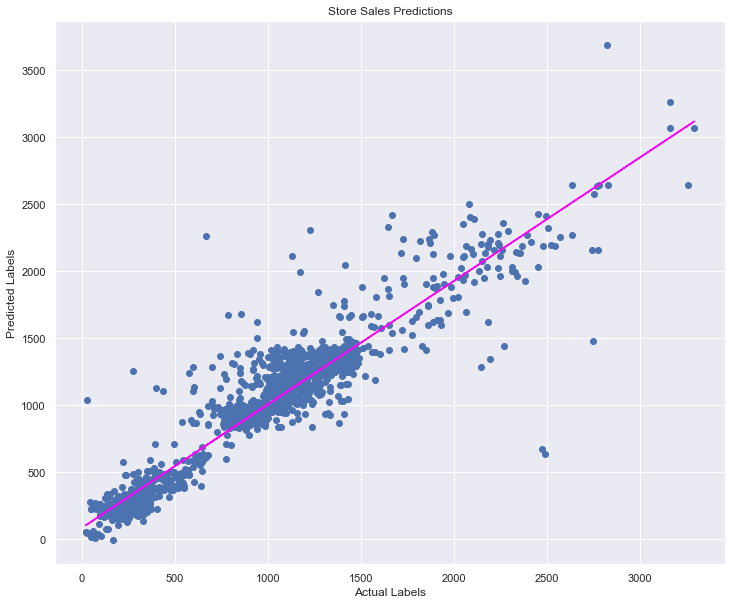

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.35, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model5=gridsearch.best_estimator_
print(model5, "\n")

# Evaluate the model using the test data
predictions = model5.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Store Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Making Predictions With Our  Model

In [217]:
Test = pd.read_csv('test_dataset.csv')

In [218]:
Test.head()

,observation_id,observation_timestamp,hour_of_day,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,3f483640-bc52-11ec-b736-8544dc068949,15/04/2022 00:23,0,Cash+Credit,0.5693,-0.1253,-0.1489,-0.8176,-0.1066,0.9103,...,-0.6373,-0.3791,-0.5581,-0.7148,-0.6487,-0.6091,1.0020,-0.5479,0.8761,NaN
1,a88b0bb0-d2ae-11ec-bd0e-f5a7c7895456,13/05/2022 11:20,11,Cash+Credit,0.3084,-0.1270,-0.1986,1.6562,-0.1247,-0.5251,...,-0.6483,-0.4419,-0.6498,0.8867,-0.6493,-0.6106,-1.9779,-0.9816,-0.1311,-0.8614
2,90611780-d607-11ec-a5d8-675445c92326,17/05/2022 17:34,17,Cash+Credit,-0.6757,0.1925,0.2534,-0.7517,-0.1247,-0.5251,...,0.6712,0.3971,2.0094,0.0464,1.8275,2.0689,0.0332,1.3795,-0.3489,1.3382
3,a98380e0-e2d2-11ec-b28f-7f4d381958ee,03/06/2022 00:18,0,Cash+Credit,-0.1747,-0.1258,-0.1709,-0.3576,-0.1247,-0.5251,...,-0.6653,-0.4437,-0.6498,0.8937,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
4,608b8e60-e4f2-11ec-8115-d3258731976b,05/06/2022 17:10,17,Cash+Credit,0.6483,-0.0612,-0.0995,0.1060,-0.1247,-0.5251,...,-0.6495,-0.4418,-0.6498,0.9006,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614


In [219]:
col_to_drop = ['hour_of_day',"observation_timestamp", 'store__gift_returns_quantity_last_hour', 'region__n_stores',
       'region__n_open_registers', 'region__sales_dollar_amt_last_hour',
       'region__returns_dollar_amt_last_hour','store__sales_quantity_rescanned_frac',
       'store__gift_sales_quantity_last_hour', 'store__occupancy_main_floor', 'store__occupancy_indoors','store__type_code', 'store__n_managers','register__returns_quantity_last_hour', 'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__returns_dollar_amt_last_hour', 'region__nighttime_returns_amt_per_hour','region__peak_returns_dollar_amt_per_hour', 'register__sales_payments_declined_frac', 'register__returns_quantity_rescanned_frac', 'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min','store__mean_service_time_per_customer', 'store__n_employees_total', 'register__sales_quantity_rescanned_frac', 'store__n_baggers', 'store__is_sufficiently_staffed','store__occupancy_checkout_areas', 'store__occupancy_backrooms', 'store__occupancy_outdoors', 'store__outdoor_temperature', 'store__parking_lot_utilization',
       'store__shelf_freespace_frac', 'region__mean_service_time_per_customer',
       'region__stdev_service_time_per_customer','store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio','store__miles_to_nearest_location','store__occupancy_food_court','store__returns_quantity_rescanned_frac', 'register__peak_returns_dollar_amt_per_hour', 'region__nighttime_sales_amt_per_hour','store__occupancy_grocery','region__peak_sales_dollar_amt_per_hour_v2',
       'region__peak_returns_dollar_amt_per_hour_v2' , 'region__nighttime_open_registers',
       'region__nighttime_service_time_per_customer', 'observation_id']
Test.drop(col_to_drop, axis=1, inplace=True)
Test.head(10)

,register__payment_types_accepted,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour
0,Cash+Credit,1.8996,-0.5796,-1.0340,-0.5493,-0.5959,-0.4345,-0.5477,1.0020
1,Cash+Credit,-0.3520,-0.7536,-0.4222,-0.5492,-0.5948,-0.4344,-0.5459,-1.9779
2,Cash+Credit,-0.3520,-0.0578,-0.0714,1.8831,1.6804,0.5216,0.5253,0.0332
3,Cash+Credit,-0.3520,-0.7536,0.9128,-0.4882,-0.5392,-0.4310,-0.4811,0.4998
4,Cash+Credit,-0.3520,-0.7536,1.0884,-0.4619,-0.4192,-0.2378,-0.3132,0.4998
5,Cash+Credit,-0.3520,-0.7536,-1.1730,-0.5455,-0.5872,-0.4323,-0.5307,-0.7843
6,Cash+Credit,-0.3520,-0.4057,-0.2621,-0.5345,-0.5210,-0.4282,-0.4675,0.0332
7,Cash+Credit,-0.3520,0.6379,-1.0564,-0.4896,0.1911,2.7972,1.6708,1.9337
8,Cash+Credit,-0.3520,-0.5796,-0.1362,-0.5487,-0.5926,-0.4339,-0.5400,0.0332
9,Cash+Credit,-0.3520,-0.5796,-1.0385,-0.5484,-0.5936,-0.4336,-0.5400,1.0020


In [220]:
Test.shape

(5179, 9)

In [221]:
Test.isnull().sum()

register__payment_types_accepted          0
cashier__title_level                      0
store__n_open_registers                   0
store__hrs_since_last_delivery            0
store__sales_dollar_amt_last_hour         0
store__sales_quantity_last_hour           0
store__returns_dollar_amt_last_hour       0
store__returns_quantity_last_hour         0
region__peak_sales_dollar_amt_per_hour    0
dtype: int64

In [222]:
datas_with_dum = pd.get_dummies(Test, drop_first = False)
Test_with_dummies = pd.get_dummies(Test, drop_first = True)

In [223]:
Test_with_dummies.head()

,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour,register__payment_types_accepted_Cash+Credit+Check,register__payment_types_accepted_Credit
0,1.8996,-0.5796,-1.0340,-0.5493,-0.5959,-0.4345,-0.5477,1.0020,0,0
1,-0.3520,-0.7536,-0.4222,-0.5492,-0.5948,-0.4344,-0.5459,-1.9779,0,0
2,-0.3520,-0.0578,-0.0714,1.8831,1.6804,0.5216,0.5253,0.0332,0,0
3,-0.3520,-0.7536,0.9128,-0.4882,-0.5392,-0.4310,-0.4811,0.4998,0,0
4,-0.3520,-0.7536,1.0884,-0.4619,-0.4192,-0.2378,-0.3132,0.4998,0,0


In [224]:
col_to_drop = ['register__payment_types_accepted_Cash+Credit+Check']
Test_with_dummies.drop(col_to_drop, axis=1, inplace=True)
Test_with_dummies.head(10)

,cashier__title_level,store__n_open_registers,store__hrs_since_last_delivery,store__sales_dollar_amt_last_hour,store__sales_quantity_last_hour,store__returns_dollar_amt_last_hour,store__returns_quantity_last_hour,region__peak_sales_dollar_amt_per_hour,register__payment_types_accepted_Credit
0,1.8996,-0.5796,-1.0340,-0.5493,-0.5959,-0.4345,-0.5477,1.0020,0
1,-0.3520,-0.7536,-0.4222,-0.5492,-0.5948,-0.4344,-0.5459,-1.9779,0
2,-0.3520,-0.0578,-0.0714,1.8831,1.6804,0.5216,0.5253,0.0332,0
3,-0.3520,-0.7536,0.9128,-0.4882,-0.5392,-0.4310,-0.4811,0.4998,0
4,-0.3520,-0.7536,1.0884,-0.4619,-0.4192,-0.2378,-0.3132,0.4998,0
5,-0.3520,-0.7536,-1.1730,-0.5455,-0.5872,-0.4323,-0.5307,-0.7843,0
6,-0.3520,-0.4057,-0.2621,-0.5345,-0.5210,-0.4282,-0.4675,0.0332,0
7,-0.3520,0.6379,-1.0564,-0.4896,0.1911,2.7972,1.6708,1.9337,0
8,-0.3520,-0.5796,-0.1362,-0.5487,-0.5926,-0.4339,-0.5400,0.0332,0
9,-0.3520,-0.5796,-1.0385,-0.5484,-0.5936,-0.4336,-0.5400,1.0020,0


In [225]:
scaler.fit(Test_with_dummies)

StandardScaler()

In [226]:
Tests = scaler.transform(Test_with_dummies)

In [227]:
x_test = Tests

In [228]:
prediction = model5.predict(x_test)
# mse = mean_squared_error(x_test, predictions)
# print("MSE:", mse)
# rmse = np.sqrt(mse)
# print("RMSE:", rmse)
# r2 = r2_score(y_test, predictions)
# print("R2:", r2)

In [229]:
print(prediction)

[1148.01881855  416.47601755 1229.48870226 ... 1658.52803496 1488.99823844
 1488.99823844]


In [230]:
results_df = pd.DataFrame({'prediction':prediction})

In [231]:
results_df.head()

,prediction
0,1148.018819
1,416.476018
2,1229.488702
3,1660.220698
4,1514.695717


In [232]:
results_df.to_csv('predictionsez.csv',index=False)